In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
import pyodbc
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
#pd.set_option('display.max_rows',None)


In [3]:
load_dotenv()
#Obtener credenciales
db_server=os.getenv("DB_SERVER")
db_name=os.getenv("DB_NAME")
db_schema=os.getenv("DB_SCHEMA")
db_tabla_entrenamiento=os.getenv("DB_TABLA_ENTRENAMIENTO")
db_tabla_destino=os.getenv("DB_TABLA_DESTINO")
db_tabla_cl=os.getenv("DB_TABLA_CL")
db_tabla_predict=os.getenv("DB_TABLA_PREDICT")


In [3]:

try:  
    connection = pyodbc.connect(f'DRIVER={{SQL Server}};SERVER={db_server};DATABASE={db_name};trusted_connection=yes')

    consulta_sql = f"""  select * from {db_name}.{db_schema}.{db_tabla_entrenamiento}  """
    df_sql_resultados = pd.read_sql(consulta_sql, connection)
        
except pyodbc.Error as e:
    print("OCURRIO UN ERROR:", e)
except Exception as e1:
    print("ERROR INESPERRADO:", e1)
finally:
    connection.close()


C:\Users\xvillanuevam\AppData\Local\Temp\ipykernel_29004\856673833.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sql_resultados = pd.read_sql(consulta_sql, connection)


In [4]:
df_sql_resultados=pd.read_pickle('C:/Users/xvillanuevam/Desktop/TRASPASO PRACTICANTE/QUERYS VARIOS/ML/dataset.pkl')

In [7]:
df_visualizar=df_sql_resultados

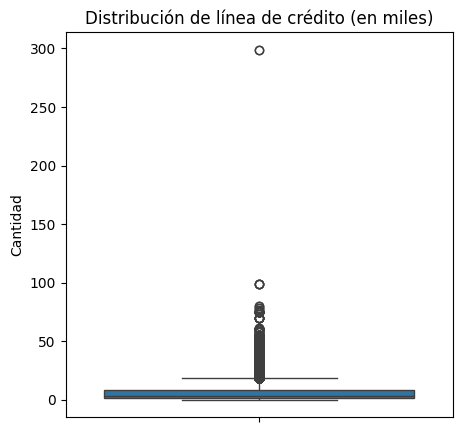

In [79]:
#LINEACREDITO

plt.figure(figsize=(5,5))
sns.boxplot(y=df_visualizar['LINEACREDITO']/1000)
plt.title('Distribución de línea de crédito (en miles)')
plt.ylabel('Cantidad')
plt.show()

In [26]:
#Identificar q numero cae en el bigote superior
q1=np.percentile(df_visualizar['LINEACREDITO'],25)
q3=np.percentile(df_visualizar['LINEACREDITO'],75)
mediana=np.percentile(df_visualizar['LINEACREDITO'],50)

iqr=q3-q1  #rango intercuartil

lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr

bigote_inferior=df_visualizar['LINEACREDITO'][df_visualizar['LINEACREDITO']>=lower_whisker].min()
bigote_superior=df_visualizar['LINEACREDITO'][df_visualizar['LINEACREDITO']<=upper_whisker].max()

print(f"Extremo inferior: {bigote_inferior}, mediana: {mediana}, extremo superior: {bigote_superior}")

Extremo inferior: 0.0, mediana: 3500.0, extremo superior: 18424.0


146354 valores vacios


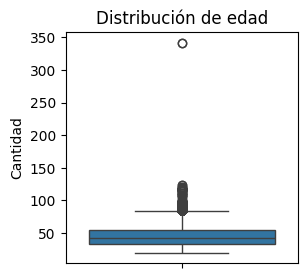

In [80]:
#EDAD

print(f"{df_visualizar['EDAD'].isnull().sum()} valores vacios")
df_visualizar_sin_nulos=df_visualizar.dropna(subset=['EDAD'])

plt.figure(figsize=(3,3))
sns.boxplot(y=df_visualizar_sin_nulos['EDAD'])
plt.title('Distribución de edad')
plt.ylabel('Cantidad')
plt.show()

In [25]:
#Identificar q numero cae en el bigote superior
q1=np.percentile(df_visualizar_sin_nulos['EDAD'],25)
q3=np.percentile(df_visualizar_sin_nulos['EDAD'],75)
mediana=np.percentile(df_visualizar_sin_nulos['EDAD'],50)

iqr=q3-q1  #rango intercuartil

lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr

bigote_inferior=df_visualizar_sin_nulos['EDAD'][df_visualizar_sin_nulos['EDAD']>=lower_whisker].min()
bigote_superior=df_visualizar_sin_nulos['EDAD'][df_visualizar_sin_nulos['EDAD']<=upper_whisker].max()

print(f"Extremo inferior: {bigote_inferior}, mediana: {mediana}, extremo superior: {bigote_superior}")

Extremo inferior: 20.0, mediana: 43.0, extremo superior: 84.0


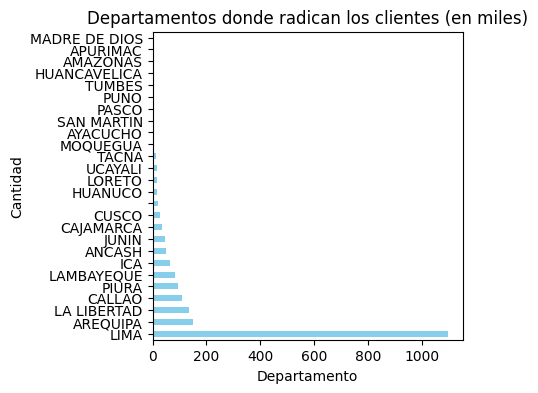

In [27]:
#DEPARTAMENTO_RENIEC
conteo=df_visualizar['DEPARTAMENTO_RENIEC'].value_counts()/1000

plt.figure(figsize=(4,4))
conteo.plot(kind='barh',color='skyblue')
plt.title('Departamentos donde radican los clientes (en miles)')
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.show()

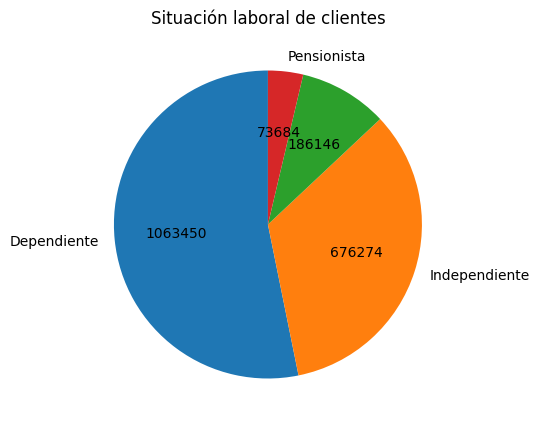

In [31]:
#SITUACIONLABORAL

conteo=df_visualizar['SITUACIONLABORAL'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
conteo,
labels=conteo.index,
autopct=lambda p: '{:.0f}'.format(p * sum(conteo)/100),
startangle=90
)
plt.title('Situación laboral de clientes')
plt.ylabel('')
plt.show()

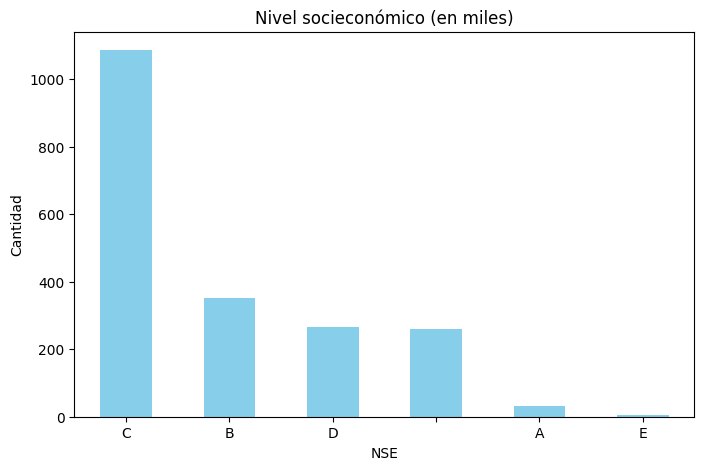

In [46]:
#NSE

conteo=df_visualizar['NSE'].value_counts()/1000

plt.figure(figsize=(8,5))
conteo.plot(kind='bar',color='skyblue')
plt.title('Nivel socieconómico (en miles)')
plt.xlabel('NSE')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

0 valores vacios


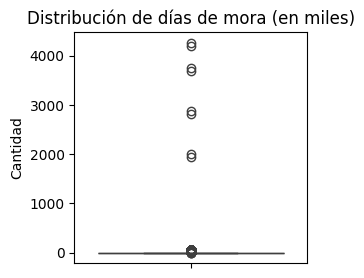

In [ ]:
#DiasMora

print(f"{df_visualizar['DiasMora'].isnull().sum()} valores vacios")

plt.figure(figsize=(3,3))
sns.boxplot(y=df_visualizar['DiasMora'])
plt.title('Distribución de días de mora')
plt.ylabel('Cantidad')
plt.show()

In [41]:
#Identificar q numero cae en el bigote superior
q1=np.percentile(df_visualizar['DiasMora'],25)
q3=np.percentile(df_visualizar['DiasMora'],75)
mediana=np.percentile(df_visualizar['DiasMora'],50)

iqr=q3-q1  #rango intercuartil

lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr

bigote_inferior=df_visualizar['DiasMora'][df_visualizar['DiasMora']>=lower_whisker].min()
bigote_superior=df_visualizar['DiasMora'][df_visualizar['DiasMora']<=upper_whisker].max()

print(f"Extremo inferior: {bigote_inferior}, mediana: {mediana}, extremo superior: {bigote_superior}")

Extremo inferior: 0, mediana: 0.0, extremo superior: 0


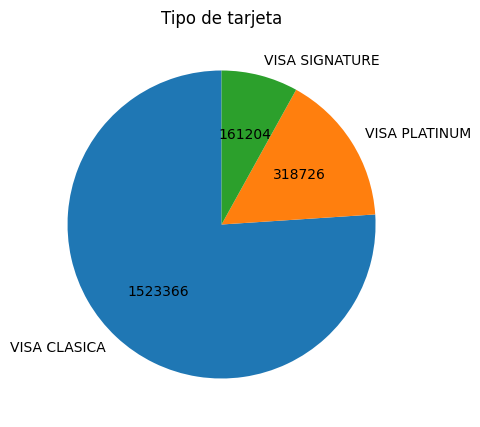

In [47]:
#NombreTipoTarjeta

conteo=df_visualizar['NombreTipoTarjeta'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
conteo,
labels=conteo.index,
autopct=lambda p: '{:.0f}'.format(p * sum(conteo)/100),
startangle=90
)
plt.title('Tipo de tarjeta')
plt.ylabel('')
plt.show()

In [8]:
df_visualizar.groupby('NombreSituacionCliente').size().reset_index(name='cantidad')

,NombreSituacionCliente,cantidad
0,CON TARJETA BLOQUEADA,29662
1,Clientes con TC Entregada en SAT habilitados p...,1072
2,Clientes habilitados para usar TC pero no han ...,164
3,Cuenta con tarjeta bloqueada,16
4,DEBE CANCELAR,95190
5,NORMAL,1877034
6,NUEVO,158


In [10]:
#NombreSituacionCliente

df_visualizar.groupby('NombreSituacionCliente').size().reset_index(name='cantidad')
   #modificamos etiquetas para abreviar
df_visualizar_modif=df_visualizar['NombreSituacionCliente']
df_visualizar_modif=df_visualizar_modif.replace('Clientes con TC Entregada en SAT habilitados para compras y han hecho su 1era compra','NUEVO')
df_visualizar_modif=df_visualizar_modif.replace('Clientes habilitados para usar TC pero no han hecho su 1er consumo','NUEVO')
df_visualizar_modif=df_visualizar_modif.replace('Cuenta con tarjeta bloqueada','CON TARJETA BLOQUEADA')



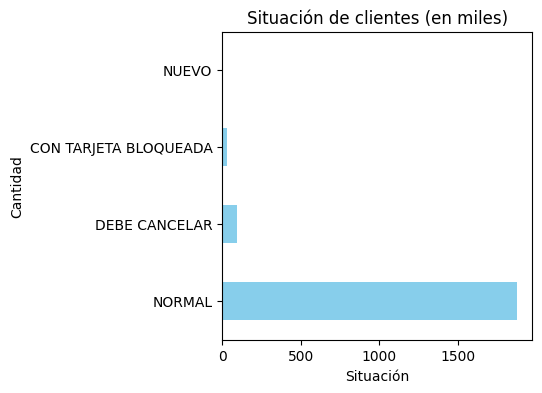

In [11]:
conteo=df_visualizar_modif.value_counts()/1000

plt.figure(figsize=(4,4))
conteo.plot(kind='barh',color='skyblue')
plt.title('Situación de clientes (en miles)')
plt.xlabel('Situación')
plt.ylabel('Cantidad')
plt.show()

In [111]:
#meses_entre_consumos
df_visualizar.groupby('meses_entre_consumos').size().reset_index(name='cantidad')


,meses_entre_consumos,cantidad
0,0.00,34972
1,0.03,3
2,0.04,24
3,0.05,161
4,0.06,719
...,...,...
122,8.00,1445
123,9.00,1085
124,10.00,870
125,11.00,643


In [ ]:
"""
#df_visualizar.groupby('meses_entre_consumos').size().reset_index(name='cantidad')
contar=df_visualizar['meses_entre_consumos'].value_counts()

porcent=(contar/len(df_visualizar))*100
result=pd.DataFrame({'valor':porcent.index,'porcentaje':porcent.values})

result=result.sort_values(by='porcentaje',ascending=False)
result
"""

329136 valores vacios


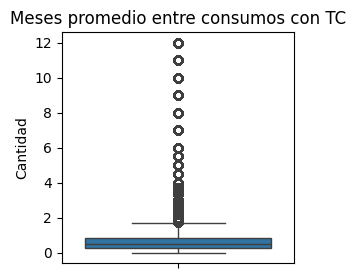

In [ ]:

print(f"{df_visualizar['meses_entre_consumos'].isnull().sum()} valores vacios")
df_visualizar_sin_nulos=df_visualizar.dropna(subset=['meses_entre_consumos'])
#Se quita nulos debido a que afectan a los resultados del gráfico, además debido a la forma de calcular este campo, un nulo no determina si meses previos al rango de tiempo analizado (12 meses) ha consumido o no
plt.figure(figsize=(3,3))
sns.boxplot(y=df_visualizar_sin_nulos['meses_entre_consumos'])
plt.title('Meses promedio entre consumos con TC')
plt.ylabel('Cantidad')
plt.show()

In [71]:
#Identificar q numero cae en el bigote superior
q1=np.percentile(df_visualizar_sin_nulos['meses_entre_consumos'],25)
q3=np.percentile(df_visualizar_sin_nulos['meses_entre_consumos'],75)
mediana=np.percentile(df_visualizar_sin_nulos['meses_entre_consumos'],50)

iqr=q3-q1  #rango intercuartil

lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr

bigote_inferior=df_visualizar_sin_nulos['meses_entre_consumos'][df_visualizar_sin_nulos['meses_entre_consumos']>=lower_whisker].min()
bigote_superior=df_visualizar_sin_nulos['meses_entre_consumos'][df_visualizar_sin_nulos['meses_entre_consumos']<=upper_whisker].max()

print(f"Extremo inferior: {bigote_inferior}, mediana: {mediana}, extremo superior: {bigote_superior}")

Extremo inferior: 0.0, mediana: 0.48, extremo superior: 1.71


0 valores vacios


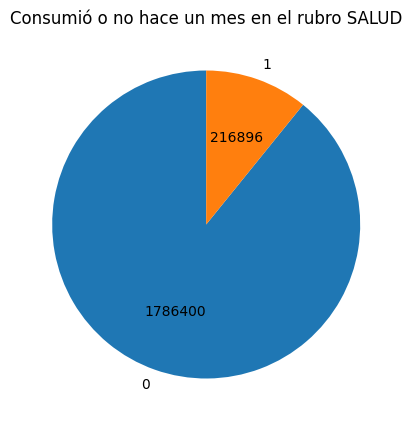

In [ ]:
#consumio_h1m_SALUD

print(f"{df_visualizar['consumio_h1m_SALUD'].isnull().sum()} valores vacios")

conteo=df_visualizar['consumio_h1m_SALUD'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(
conteo,
labels=conteo.index,
autopct=lambda p: '{:.0f}'.format(p * sum(conteo)/100),
startangle=90
)
plt.title('Consumió o no hace un mes en el rubro salud')
plt.ylabel('')
plt.show()

0 valores vacios


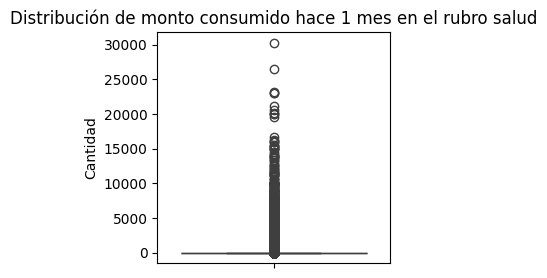

In [94]:
#monto_consum_h1m_SALUD

print(f"{df_visualizar['monto_consum_h1m_SALUD'].isnull().sum()} valores vacios")

plt.figure(figsize=(3,3))
sns.boxplot(y=df_visualizar['monto_consum_h1m_SALUD'])
plt.title('Distribución de monto consumido hace 1 mes en el rubro salud')
plt.ylabel('Cantidad')
plt.show()

In [84]:
#Identificar q numero cae en el bigote superior
q1=np.percentile(df_visualizar['monto_consum_h1m_SALUD'],25)
q3=np.percentile(df_visualizar['monto_consum_h1m_SALUD'],75)
mediana=np.percentile(df_visualizar['monto_consum_h1m_SALUD'],50)

iqr=q3-q1  #rango intercuartil

lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr

bigote_inferior=df_visualizar['monto_consum_h1m_SALUD'][df_visualizar['monto_consum_h1m_SALUD']>=lower_whisker].min()
bigote_superior=df_visualizar['monto_consum_h1m_SALUD'][df_visualizar['monto_consum_h1m_SALUD']<=upper_whisker].max()

print(f"Extremo inferior: {bigote_inferior}, mediana: {mediana}, extremo superior: {bigote_superior}")

Extremo inferior: 0.0, mediana: 0.0, extremo superior: 0.0


0 valores vacios


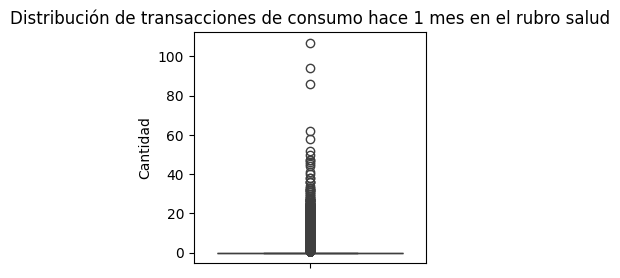

In [96]:
#trx_consum_h1m_SALUD

print(f"{df_visualizar['trx_consum_h1m_SALUD'].isnull().sum()} valores vacios")

plt.figure(figsize=(3,3))
sns.boxplot(y=df_visualizar['trx_consum_h1m_SALUD'])
plt.title('Distribución de transacciones de consumo hace 1 mes en el rubro salud')
plt.ylabel('Cantidad')
plt.show()

In [97]:
#Identificar q numero cae en el bigote superior
q1=np.percentile(df_visualizar['trx_consum_h1m_SALUD'],25)
q3=np.percentile(df_visualizar['trx_consum_h1m_SALUD'],75)
mediana=np.percentile(df_visualizar['trx_consum_h1m_SALUD'],50)

iqr=q3-q1  #rango intercuartil

lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr

bigote_inferior=df_visualizar['trx_consum_h1m_SALUD'][df_visualizar['trx_consum_h1m_SALUD']>=lower_whisker].min()
bigote_superior=df_visualizar['trx_consum_h1m_SALUD'][df_visualizar['trx_consum_h1m_SALUD']<=upper_whisker].max()

print(f"Extremo inferior: {bigote_inferior}, mediana: {mediana}, extremo superior: {bigote_superior}")

Extremo inferior: 0, mediana: 0.0, extremo superior: 0


0 valores vacios


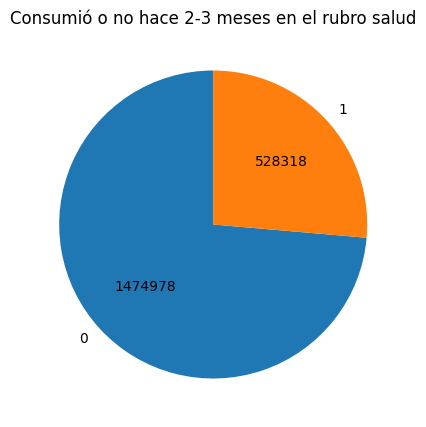

In [ ]:
#consumio_h2m_h3m_SALUD

print(f"{df_visualizar['consumio_h2m_h3m_SALUD'].isnull().sum()} valores vacios")

conteo=df_visualizar['consumio_h2m_h3m_SALUD'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(
conteo,
labels=conteo.index,
autopct=lambda p: '{:.0f}'.format(p * sum(conteo)/100),
startangle=90
)
plt.title('Consumió o no hace 2-3 meses en el rubro salud')
plt.ylabel('')
plt.show()

0 valores vacios


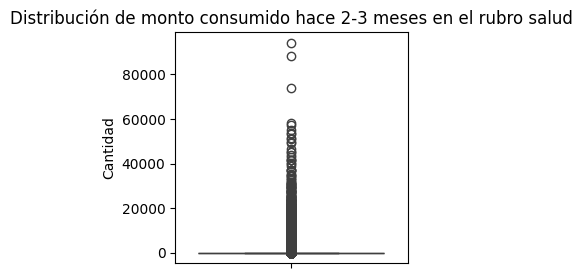

In [101]:
#monto_consum_h2m_h3m_SALUD

print(f"{df_visualizar['monto_consum_h2m_h3m_SALUD'].isnull().sum()} valores vacios")

plt.figure(figsize=(3,3))
sns.boxplot(y=df_visualizar['monto_consum_h2m_h3m_SALUD'])
plt.title('Distribución de monto consumido hace 2-3 meses en el rubro salud')
plt.ylabel('Cantidad')
plt.show()

In [102]:
#Identificar q numero cae en el bigote superior
q1=np.percentile(df_visualizar['monto_consum_h2m_h3m_SALUD'],25)
q3=np.percentile(df_visualizar['monto_consum_h2m_h3m_SALUD'],75)
mediana=np.percentile(df_visualizar['monto_consum_h2m_h3m_SALUD'],50)

iqr=q3-q1  #rango intercuartil

lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr

bigote_inferior=df_visualizar['monto_consum_h2m_h3m_SALUD'][df_visualizar['monto_consum_h2m_h3m_SALUD']>=lower_whisker].min()
bigote_superior=df_visualizar['monto_consum_h2m_h3m_SALUD'][df_visualizar['monto_consum_h2m_h3m_SALUD']<=upper_whisker].max()

print(f"Extremo inferior: {bigote_inferior}, mediana: {mediana}, extremo superior: {bigote_superior}")

Extremo inferior: 0.0, mediana: 0.0, extremo superior: 41.74


0 valores vacios


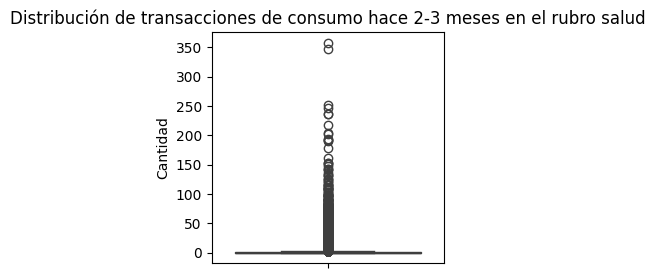

In [103]:
#trx_consum_h2m_h3m_SALUD

print(f"{df_visualizar['trx_consum_h2m_h3m_SALUD'].isnull().sum()} valores vacios")

plt.figure(figsize=(3,3))
sns.boxplot(y=df_visualizar['trx_consum_h2m_h3m_SALUD'])
plt.title('Distribución de transacciones de consumo hace 2-3 meses en el rubro salud')
plt.ylabel('Cantidad')
plt.show()

In [104]:
#Identificar q numero cae en el bigote superior
q1=np.percentile(df_visualizar['trx_consum_h2m_h3m_SALUD'],25)
q3=np.percentile(df_visualizar['trx_consum_h2m_h3m_SALUD'],75)
mediana=np.percentile(df_visualizar['trx_consum_h2m_h3m_SALUD'],50)

iqr=q3-q1  #rango intercuartil

lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr

bigote_inferior=df_visualizar['trx_consum_h2m_h3m_SALUD'][df_visualizar['trx_consum_h2m_h3m_SALUD']>=lower_whisker].min()
bigote_superior=df_visualizar['trx_consum_h2m_h3m_SALUD'][df_visualizar['trx_consum_h2m_h3m_SALUD']<=upper_whisker].max()

print(f"Extremo inferior: {bigote_inferior}, mediana: {mediana}, extremo superior: {bigote_superior}")

Extremo inferior: 0, mediana: 0.0, extremo superior: 2


0 valores vacios


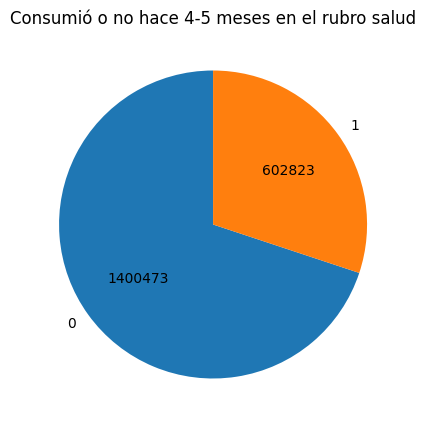

In [ ]:
#consumio_h4m_h5m_SALUD

print(f"{df_visualizar['consumio_h4m_h5m_SALUD'].isnull().sum()} valores vacios")

conteo=df_visualizar['consumio_h4m_h5m_SALUD'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(
conteo,
labels=conteo.index,
autopct=lambda p: '{:.0f}'.format(p * sum(conteo)/100),
startangle=90
)
plt.title('Consumió o no hace 4-5 meses en el rubro salud')
plt.ylabel('')
plt.show()

0 valores vacios


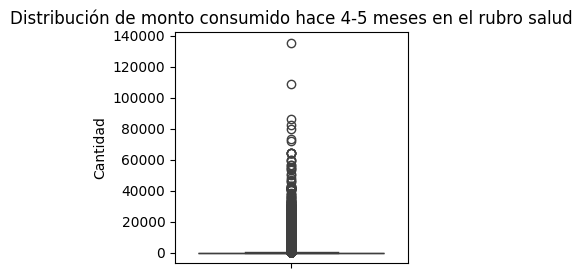

In [106]:
#monto_consum_h4m_h5m_SALUD

print(f"{df_visualizar['monto_consum_h4m_h5m_SALUD'].isnull().sum()} valores vacios")

plt.figure(figsize=(3,3))
sns.boxplot(y=df_visualizar['monto_consum_h4m_h5m_SALUD'])
plt.title('Distribución de monto consumido hace 4-5 meses en el rubro salud')
plt.ylabel('Cantidad')
plt.show()

In [107]:
#Identificar q numero cae en el bigote superior
q1=np.percentile(df_visualizar['monto_consum_h4m_h5m_SALUD'],25)
q3=np.percentile(df_visualizar['monto_consum_h4m_h5m_SALUD'],75)
mediana=np.percentile(df_visualizar['monto_consum_h4m_h5m_SALUD'],50)

iqr=q3-q1  #rango intercuartil

lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr

bigote_inferior=df_visualizar['monto_consum_h4m_h5m_SALUD'][df_visualizar['monto_consum_h4m_h5m_SALUD']>=lower_whisker].min()
bigote_superior=df_visualizar['monto_consum_h4m_h5m_SALUD'][df_visualizar['monto_consum_h4m_h5m_SALUD']<=upper_whisker].max()

print(f"Extremo inferior: {bigote_inferior}, mediana: {mediana}, extremo superior: {bigote_superior}")

Extremo inferior: 0.0, mediana: 0.0, extremo superior: 118.75


0 valores vacios


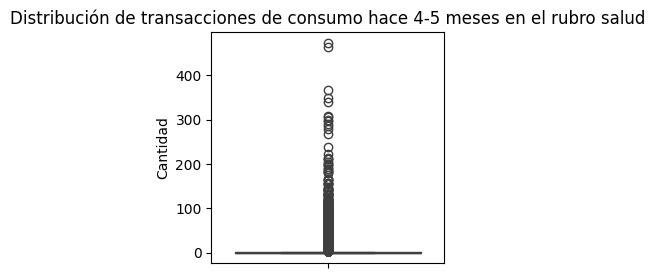

In [108]:
#trx_consum_h4m_h5m_SALUD

print(f"{df_visualizar['trx_consum_h4m_h5m_SALUD'].isnull().sum()} valores vacios")

plt.figure(figsize=(3,3))
sns.boxplot(y=df_visualizar['trx_consum_h4m_h5m_SALUD'])
plt.title('Distribución de transacciones de consumo hace 4-5 meses en el rubro salud')
plt.ylabel('Cantidad')
plt.show()

In [109]:
#Identificar q numero cae en el bigote superior
q1=np.percentile(df_visualizar['trx_consum_h4m_h5m_SALUD'],25)
q3=np.percentile(df_visualizar['trx_consum_h4m_h5m_SALUD'],75)
mediana=np.percentile(df_visualizar['trx_consum_h4m_h5m_SALUD'],50)

iqr=q3-q1  #rango intercuartil

lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr

bigote_inferior=df_visualizar['trx_consum_h4m_h5m_SALUD'][df_visualizar['trx_consum_h4m_h5m_SALUD']>=lower_whisker].min()
bigote_superior=df_visualizar['trx_consum_h4m_h5m_SALUD'][df_visualizar['trx_consum_h4m_h5m_SALUD']<=upper_whisker].max()

print(f"Extremo inferior: {bigote_inferior}, mediana: {mediana}, extremo superior: {bigote_superior}")

Extremo inferior: 0, mediana: 0.0, extremo superior: 2


1268771 valores vacios


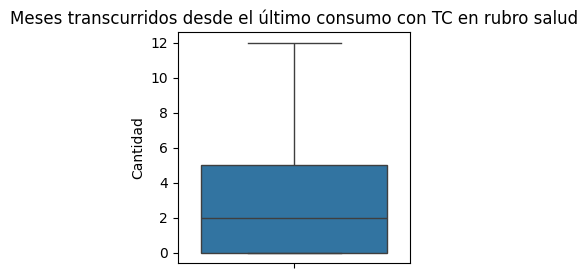

In [114]:
#ult_mes_consum_SALUD
print(f"{df_visualizar['ult_mes_consum_SALUD'].isnull().sum()} valores vacios")
df_visualizar_sin_nulos=df_visualizar.dropna(subset=['ult_mes_consum_SALUD'])
#No se considera nulos para la visualizacion porque no se puede determinar si antes del rango de tiempo analizado (12 meses) ha consumido en el rubro salud o no (para la fase 3 se evaluará colocarle un valor especial en la categorizacion)
plt.figure(figsize=(3,3))
sns.boxplot(y=df_visualizar_sin_nulos['ult_mes_consum_SALUD'])
plt.title('Meses transcurridos desde el último consumo con TC en rubro salud')
plt.ylabel('Cantidad')
plt.show()

In [115]:
#Identificar q numero cae en el bigote superior
q1=np.percentile(df_visualizar_sin_nulos['ult_mes_consum_SALUD'],25)
q3=np.percentile(df_visualizar_sin_nulos['ult_mes_consum_SALUD'],75)
mediana=np.percentile(df_visualizar_sin_nulos['ult_mes_consum_SALUD'],50)

iqr=q3-q1  #rango intercuartil

lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr

bigote_inferior=df_visualizar_sin_nulos['ult_mes_consum_SALUD'][df_visualizar_sin_nulos['ult_mes_consum_SALUD']>=lower_whisker].min()
bigote_superior=df_visualizar_sin_nulos['ult_mes_consum_SALUD'][df_visualizar_sin_nulos['ult_mes_consum_SALUD']<=upper_whisker].max()

print(f"Extremo inferior: {bigote_inferior}, mediana: {mediana}, extremo superior: {bigote_superior}")

Extremo inferior: 0.0, mediana: 2.0, extremo superior: 12.0


1515091 valores vacios


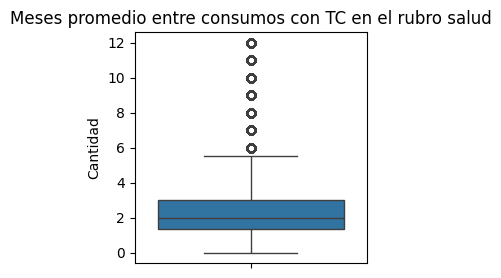

In [ ]:
#meses_entre_consum_SALUD
print(f"{df_visualizar['meses_entre_consum_SALUD'].isnull().sum()} valores vacios")
df_visualizar_sin_nulos=df_visualizar.dropna(subset=['meses_entre_consum_SALUD'])
#No se considera nulos para la visualizacion porque no se puede determinar si antes del rango de tiempo analizado (12 meses) ha consumido en el rubro salud o no (para la fase 3 se evaluará colocarle un valor especial en la categorizacion)

plt.figure(figsize=(3,3))
sns.boxplot(y=df_visualizar_sin_nulos['meses_entre_consum_SALUD'])
plt.title('Meses promedio entre consumos con TC en el rubro salud')
plt.ylabel('Cantidad')
plt.show()


In [117]:
#Identificar q numero cae en el bigote superior
q1=np.percentile(df_visualizar_sin_nulos['meses_entre_consum_SALUD'],25)
q3=np.percentile(df_visualizar_sin_nulos['meses_entre_consum_SALUD'],75)
mediana=np.percentile(df_visualizar_sin_nulos['meses_entre_consum_SALUD'],50)

iqr=q3-q1  #rango intercuartil

lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr

bigote_inferior=df_visualizar_sin_nulos['meses_entre_consum_SALUD'][df_visualizar_sin_nulos['meses_entre_consum_SALUD']>=lower_whisker].min()
bigote_superior=df_visualizar_sin_nulos['meses_entre_consum_SALUD'][df_visualizar_sin_nulos['meses_entre_consum_SALUD']<=upper_whisker].max()

print(f"Extremo inferior: {bigote_inferior}, mediana: {mediana}, extremo superior: {bigote_superior}")

Extremo inferior: 0.0, mediana: 2.0, extremo superior: 5.5


In [ ]:
'PERIODO_PREDECIR',''

0 valores vacios


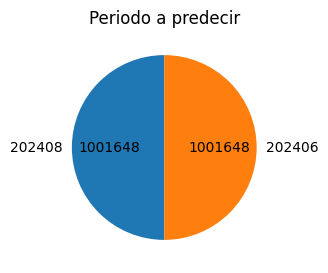

In [119]:
#PERIODO_PREDECIR

print(f"{df_visualizar['PERIODO_PREDECIR'].isnull().sum()} valores vacios")

conteo=df_visualizar['PERIODO_PREDECIR'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(
conteo,
labels=conteo.index,
autopct=lambda p: '{:.0f}'.format(p * sum(conteo)/100),
startangle=90
)
plt.title('Periodo a predecir')
plt.ylabel('')
plt.show()

0 valores vacios


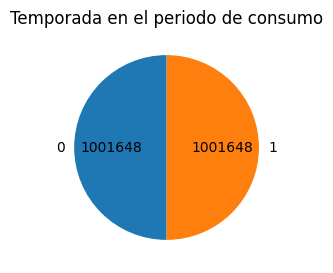

In [120]:
#Periodo_en_temporada_consumo

print(f"{df_visualizar['Periodo_en_temporada_consumo'].isnull().sum()} valores vacios")

conteo=df_visualizar['Periodo_en_temporada_consumo'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(
conteo,
labels=conteo.index,
autopct=lambda p: '{:.0f}'.format(p * sum(conteo)/100),
startangle=90
)
plt.title('Temporada en el periodo de consumo')
plt.ylabel('')
plt.show()